## データの確認

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

### データの読み込み

In [3]:
data_dir = "data"
split = "train"  # "train", "val", "test"
X = torch.load(os.path.join(data_dir, f"{split}_X.pt"))
subject_idxs = torch.load(os.path.join(data_dir, f"{split}_subject_idxs.pt"))

if split in ["train", "val"]:
    y = torch.load(os.path.join(data_dir, f"{split}_y.pt"))

### データの可視化

In [95]:
print(X.size())
print(subject_idxs.size())
print(y.size())

torch.Size([16432, 271, 281])
torch.Size([16432])
torch.Size([16432])


In [96]:
print(torch.unique(subject_idxs, return_counts=True))

(tensor([0, 1, 2, 3]), tensor([4108, 4108, 4108, 4108]))


In [97]:
tmp, counts = torch.unique(y, return_counts=True)
print(tmp, counts)
print(torch.unique(counts, return_counts=True))

tensor([   0,    1,    2,  ..., 1851, 1852, 1853]) tensor([8, 8, 8,  ..., 8, 8, 8])
(tensor([ 8, 16]), tensor([1654,  200]))


In [98]:
tmp[counts == 16]

tensor([   9,   12,   16,   17,   41,   43,   45,   46,   54,   55,   59,   60,
          62,   63,   85,   97,   99,  102,  105,  107,  108,  111,  113,  116,
         120,  123,  140,  148,  150,  154,  155,  182,  186,  201,  204,  215,
         216,  229,  245,  252,  262,  273,  281,  286,  312,  315,  319,  334,
         355,  360,  370,  395,  400,  421,  422,  426,  432,  435,  441,  457,
         458,  461,  468,  477,  489,  501,  505,  513,  514,  515,  516,  518,
         519,  540,  542,  548,  563,  579,  600,  617,  619,  630,  632,  647,
         669,  697,  702,  707,  719,  720,  734,  761,  764,  766,  774,  775,
         781,  798,  799,  808,  810,  825,  832,  839,  840,  852,  864,  869,
         873,  879,  886,  898,  905,  915,  931,  933,  960,  966,  967,  977,
         987,  989,  999, 1002, 1017, 1020, 1021, 1029, 1056, 1063, 1069, 1074,
        1076, 1093, 1095, 1103, 1105, 1129, 1133, 1145, 1165, 1168, 1198, 1212,
        1230, 1233, 1253, 1263, 1265, 13

In [93]:
tmp[counts == 64]

tensor([   9,   12,   16,   17,   41,   43,   45,   46,   54,   55,   59,   60,
          62,   63,   85,   97,   99,  102,  105,  107,  108,  111,  113,  116,
         120,  123,  140,  148,  150,  154,  155,  182,  186,  201,  204,  215,
         216,  229,  245,  252,  262,  273,  281,  286,  312,  315,  319,  334,
         355,  360,  370,  395,  400,  421,  422,  426,  432,  435,  441,  457,
         458,  461,  468,  477,  489,  501,  505,  513,  514,  515,  516,  518,
         519,  540,  542,  548,  563,  579,  600,  617,  619,  630,  632,  647,
         669,  697,  702,  707,  719,  720,  734,  761,  764,  766,  774,  775,
         781,  798,  799,  808,  810,  825,  832,  839,  840,  852,  864,  869,
         873,  879,  886,  898,  905,  915,  931,  933,  960,  966,  967,  977,
         987,  989,  999, 1002, 1017, 1020, 1021, 1029, 1056, 1063, 1069, 1074,
        1076, 1093, 1095, 1103, 1105, 1129, 1133, 1145, 1165, 1168, 1198, 1212,
        1230, 1233, 1253, 1263, 1265, 13

In [82]:
label_ids = torch.concat([y.reshape(1, -1), subject_idxs.reshape(1, -1)])
label_ids = torch.transpose(label_ids, 0, 1)

In [83]:
tmp, counts = torch.unique(label_ids, return_counts=True, dim=0)
print(tmp, counts)

tensor([[   0,    0],
        [   0,    1],
        [   0,    2],
        ...,
        [1853,    1],
        [1853,    2],
        [1853,    3]]) tensor([2, 2, 2,  ..., 2, 2, 2])


In [131]:
torch.unique(counts, return_counts=True)

(tensor([ 8, 16]), tensor([1654,  200]))

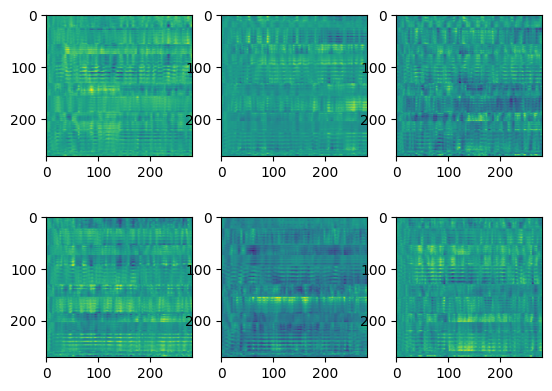

In [36]:
for i in range(1,2*3+1):
    plt.subplot(2,3,i)
    plt.imshow(np.array(X[i]))

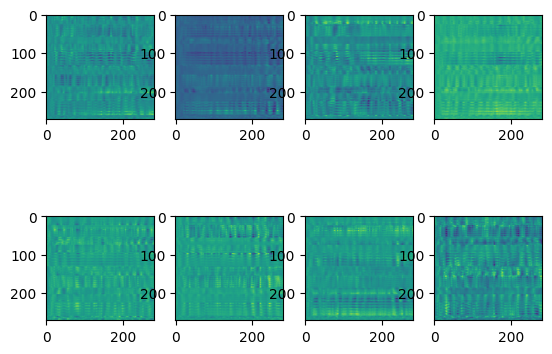

In [139]:
for i in range(1, 8+1):
    plt.subplot(2, 4, i)
    plt.imshow(X[torch.logical_and(subject_idxs==0, y==0)][i-1])


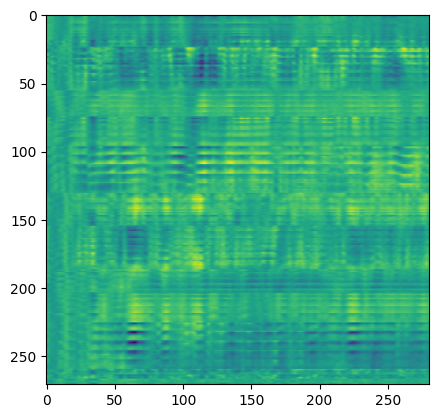

In [37]:
plt.imshow(np.array(X[0]))

In [137]:
X[torch.logical_and(subject_idxs==0, y==0)].size()

torch.Size([8, 271, 281])

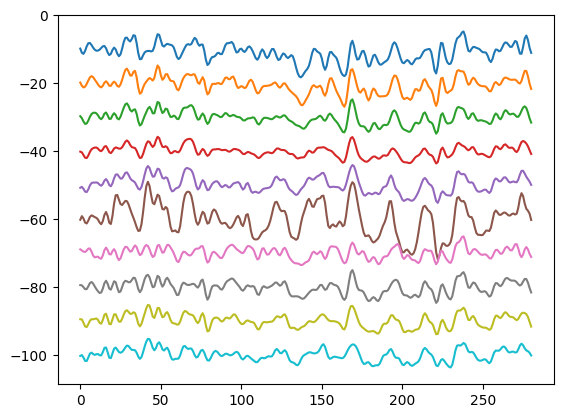

In [141]:
for i in range(1,10+1):
    # plt.subplot(2,1,i)
    plt.plot(np.array(X[torch.logical_and(subject_idxs==0, y==0)][0,i]) - 10*i)

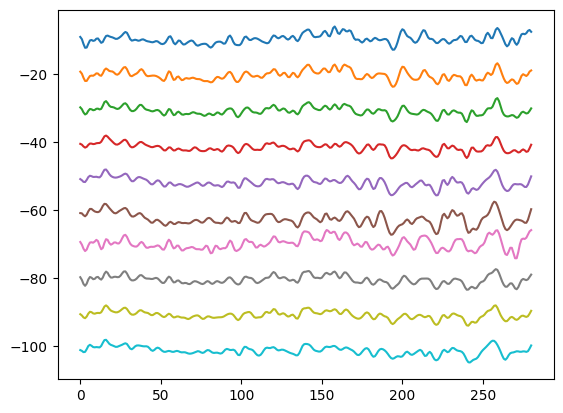

In [142]:
for i in range(1,10+1):
    # plt.subplot(2,1,i)
    plt.plot(np.array(X[torch.logical_and(subject_idxs==0, y==0)][1,i]) - 10*i)

脳波データ  
- データのサイズ  
X: (65728, 271, 281)  
subject_idxs: (65728)  
y: (65728)  
サンプル数: 訓練65,728サンプル(16,432サンプル * 4人), 検証16,432サンプル、テスト16,432サンプル = 合計98,592サンプル  
入力: 脳波データ (チャネル271, 系列長281)  
出力: 1854クラスのラベル  
訓練: 8サンプル * 4人 * 1654ラベル + 16サンプル * 4人 * 200ラベル = 65,728サンプル  
検証: 2サンプル * 4人 * 1654ラベル + 4サンプル * 4人 * 200ラベル = 16,432サンプル  
テスト: 
サンプル数が多いラベルは固定しているのか？  
→ サンプル数の多い200ラベルはtrainとvalで同じであるので、testでも同じかもしれない  
→ つまり、答えの数が固定されている可能性が高いので、予想から調整するとスコアが上がるかもしれない!?  

- サンプルによって全体の明るさが異なる  
 画像の前処理で行われるような規格化(平均0, 標準偏差1に変換)や、より高度な手法が使えるかもしれない

- 脳波データは3次元で、(サンプルの違い、チャネル, 時間)と思われる  
単なる画像とは異なり、チャネル間のつながりは比較的弱い  
 畳み込み方を工夫する必要がある  
 時間のデータなので、フーリエ変換などによりスペクトルに変換すると意味がありそう  

脳波データのドメイン知識が必要！

画像
- 22,448枚の画像？ 22,448*4=89,792  8,800だけサンプル数と差がある  
22,448 -  
(8+2+2) * 1654 + 13 * 200 ...?  

脳波
- 周波数によって、デルタ波(1-3Hz)、シータ波(4-7Hz)、アルファ波(8-13Hz)、ベータ波(14Hz-)と分けられる  


- 脳波は、約1,000億個あるニューロンによって活動電位が生成され、電気信号が伝達して発生するものである。

- 脳波の解析(加工)方法として、加算平均法、双極子推定法、周波数解析、コヒーレンス法、主成分分析、独立成分解析  
→ 加算平均法は、同じ刺激に対する脳波を測定して、平均する方法で、小さいシグナルを取るためにノイズを減らす方法と思われる。同じ人でのノイズの大きさを見積もれる？ 応用して、ノイズの乗ったデータを生成することもできる!?  
→ 主成分分析をして、同じクラスに分類されるものが近い距離になるように前処理を考えるのはありかも。





### 周波数解析(フーリエ変換)してみる

In [19]:
X_0_0 = X[torch.logical_and(subject_idxs==0, y==0)]
X_0_0.size()

torch.Size([8, 271, 281])

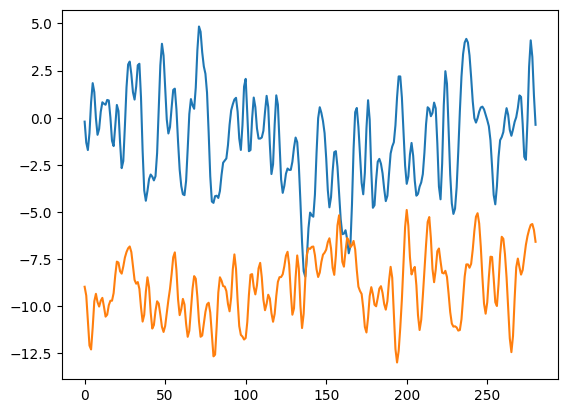

In [39]:
plt.plot(X_0_0[0,0, :], "-")
plt.plot(X_0_0[1,0, :]-10, "-")

/home/tamaki/.pyenv/versions/anaconda3-2021.11/envs/dlbasics/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/tamaki/.pyenv/versions/anaconda3-2021.11/envs/dlbasics/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


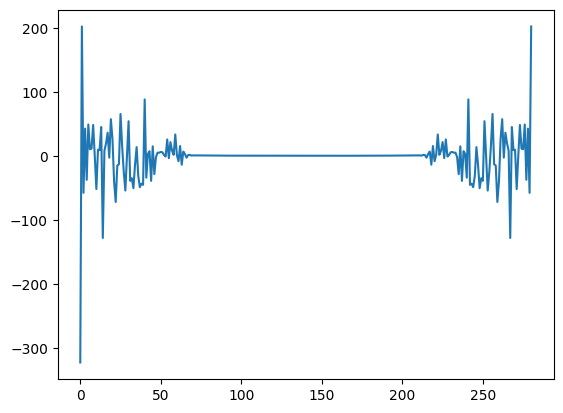

In [27]:
plt.plot(torch.fft.fft(X_0_0[0, 0]))

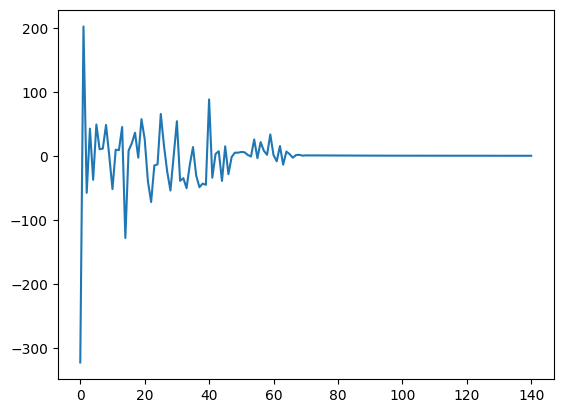

In [28]:
plt.plot(torch.fft.rfft(X_0_0[0, 0]))

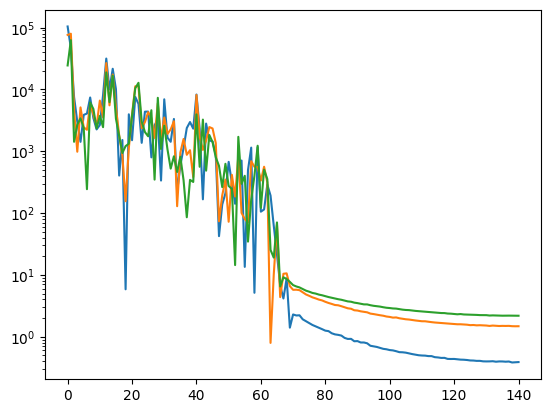

In [34]:
plt.yscale('log')
plt.plot(torch.abs(torch.fft.rfft(X_0_0[0, 0])) ** 2)
plt.plot(torch.abs(torch.fft.rfft(X_0_0[0, 1])) ** 2)
plt.plot(torch.abs(torch.fft.rfft(X_0_0[0, 2])) ** 2)
plt.show()

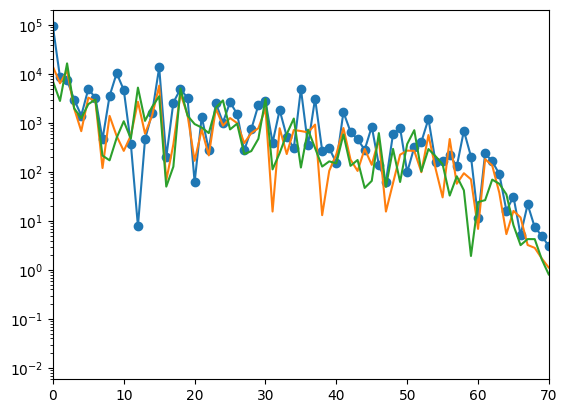

In [49]:
plt.yscale('log')
plt.xlim(0, 70)
plt.plot(torch.abs(torch.fft.rfft(X_0_0[1, 0])) ** 2, '-o')
plt.plot(torch.abs(torch.fft.rfft(X_0_0[1, 1])) ** 2)
plt.plot(torch.abs(torch.fft.rfft(X_0_0[1, 2])) ** 2)
plt.show()

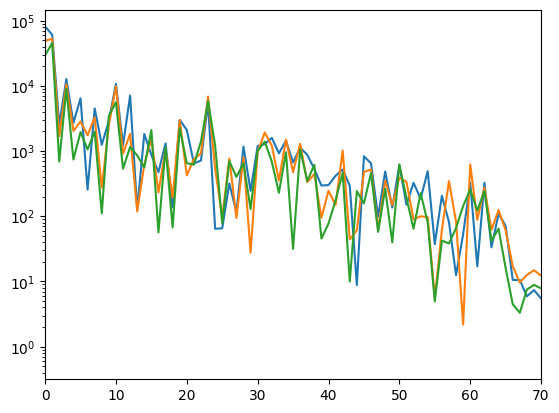

In [52]:
plt.yscale('log')
plt.xlim(0, 70)
plt.plot(torch.abs(torch.fft.rfft(X[1, 0])) ** 2)
plt.plot(torch.abs(torch.fft.rfft(X[1, 1])) ** 2)
plt.plot(torch.abs(torch.fft.rfft(X[1, 2])) ** 2)
plt.show()

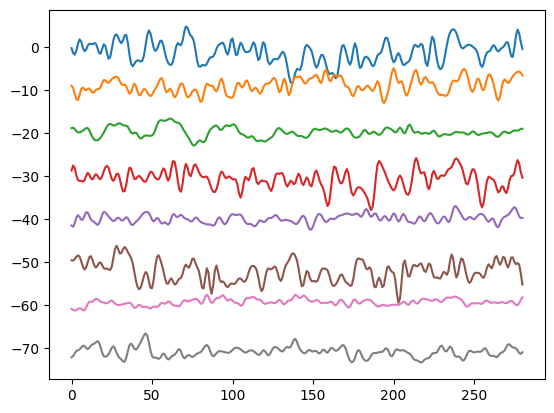

In [40]:
for i in range(len(X_0_0)):
    plt.plot(X_0_0[i,0, :] - 10 * i, "-")

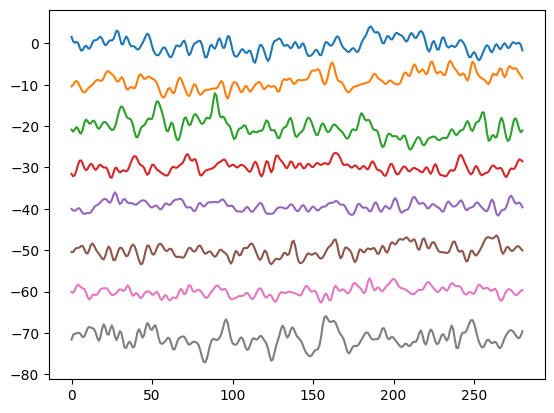

In [41]:
for i in range(len(X_0_0)):
    plt.plot(X[i,0, :] - 10 * i, "-")

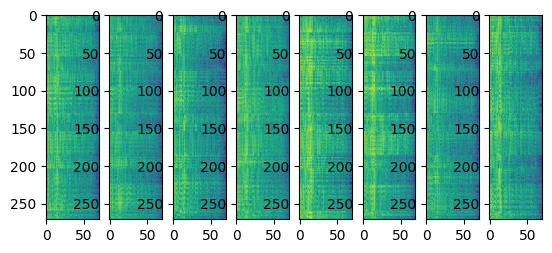

In [76]:
# 同じクラスのデータ
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(torch.log(torch.abs(torch.fft.rfft(X_0_0[i])[:, :70]) ** 2))

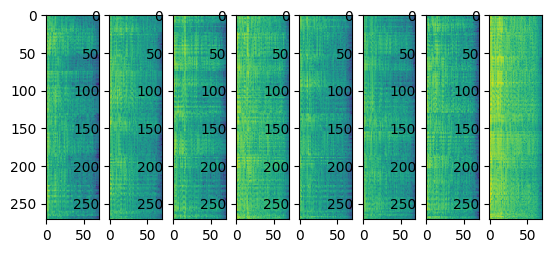

In [74]:
# ランダムなクラスのデータ
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(torch.log(torch.abs(torch.fft.rfft(X[i])[:, :70]) ** 2))

フーリエ変換したら、クラス毎の違いが明らかになった  
方向性としては良さそう!  
考えられる工夫
- 平均0, 分散1に標準化する  
← 強度の違いは、検出機の状態による気がするため  
→ やってみて、クラス内比較、強度の強いクラス内、クラス外で比較する  
→ 最終的な予想がどちらが良いか試してみる必要がある

音声処理を高速に行えるtorchaudioライブラリがあるらしい  
メルスペクトログラムを計算できそう

### チャネルごとに標準化した方が良いと思う。

In [77]:
# mean = X_0_0[0].mean(dim=1)
# std = X_0_0[0, 0].std()
# X_0_0_std = (X_0_0 - mean) / std

In [150]:
def transform_std(data):
    assert data.size() == torch.Size([271, 281])
    mean = data.mean(dim=1, keepdim=True)
    std = data.std(dim=1, keepdim=True)
    X_0_0_std = (data - mean) / (std + 10**(-6))  # 0除算を防ぐ
    return X_0_0_std

In [94]:
# mean = X_0_0[0].mean(dim=1, keepdim=True)
# std = X_0_0[0].std(dim=1, keepdim=True)
# X_0_0_std = (X_0_0[0] - mean) / std

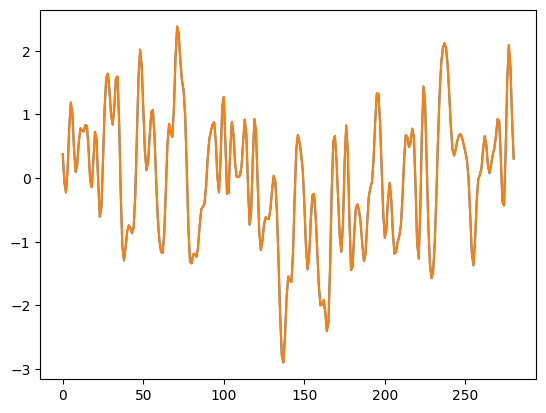

In [115]:
# plt.plot(X_0_0_std[0])
plt.plot(transform_std(X_0_0[0])[0])

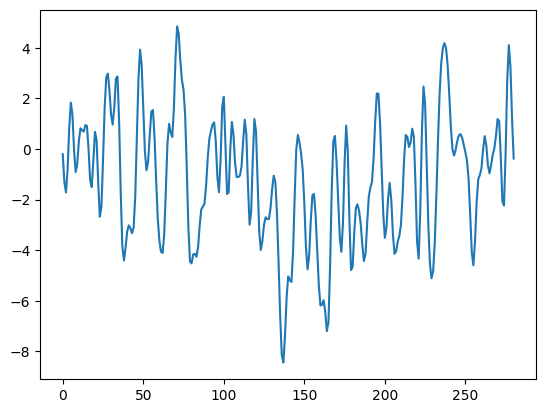

In [69]:
plt.plot(X_0_0[0, 0])

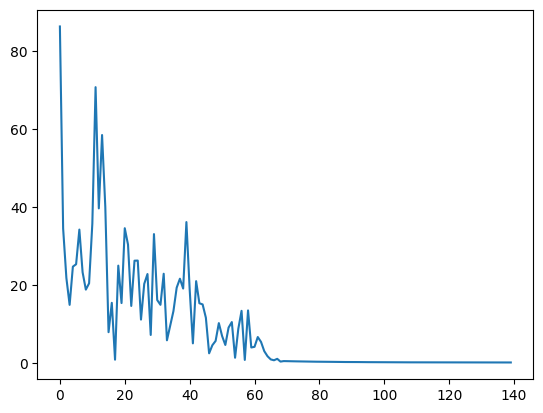

In [124]:
plt.plot(torch.abs(torch.fft.rfft(transform_std(X_0_0[0])))[0, 1:])

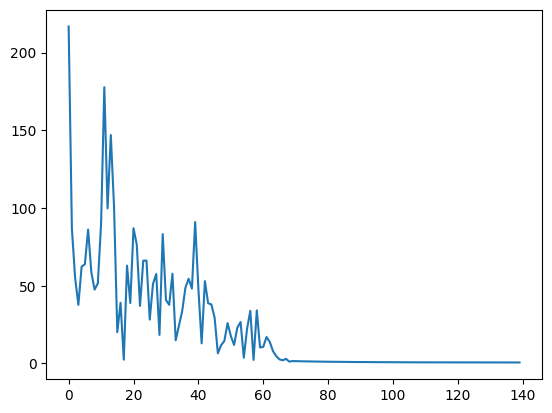

In [123]:
plt.plot(torch.abs(torch.fft.rfft(X_0_0[0]))[0, 1:])

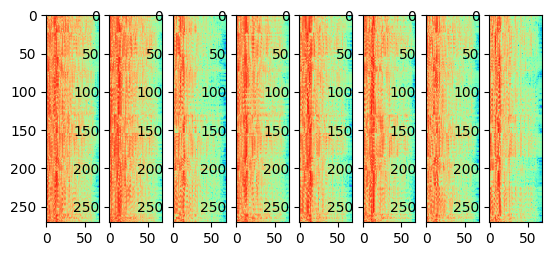

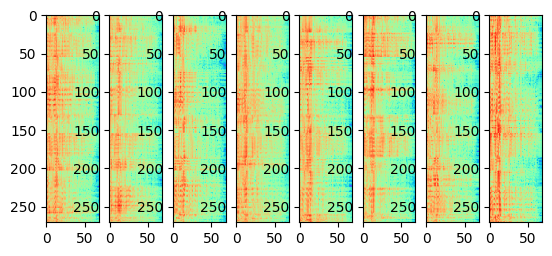

In [136]:
# 同じクラスのデータ
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(torch.log(torch.abs(torch.fft.rfft(transform_std(X_0_0[i]))[:, 1:70]) ** 2), cmap="rainbow")
plt.show()

# 同じクラスのデータ(比較用)
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(torch.log(torch.abs(torch.fft.rfft(X_0_0[i])[:, 1:70]) ** 2), cmap="rainbow")
plt.show()

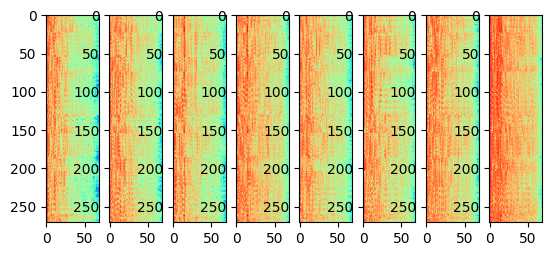

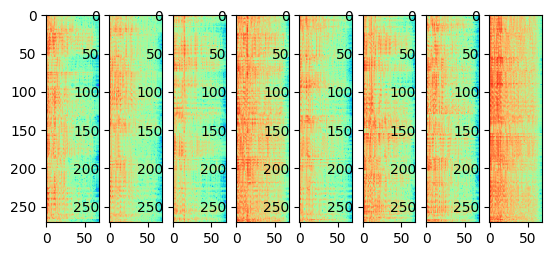

In [135]:
# ランダムなクラスのデータ
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(torch.log(torch.abs(torch.fft.rfft(transform_std(X[i]))[:, 1:70]) ** 2), cmap="rainbow")
plt.show()

# ランダムなクラスのデータ(比較用)
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(torch.log(torch.abs(torch.fft.rfft(X[i])[:, 1:70]) ** 2), cmap="rainbow")
plt.show()

平均を0にしたので、フーリエ変換した0個目の値がほぼゼロになる。よって、除外した(するべき)。

CNNに入力するときは、学習しやすいように正規化していた方がよい。  
→ 各画像毎に全体の正規化をする(GCN)  
→ より高度な画像の前処理手法(ZCA白色化)が使える可能性がある

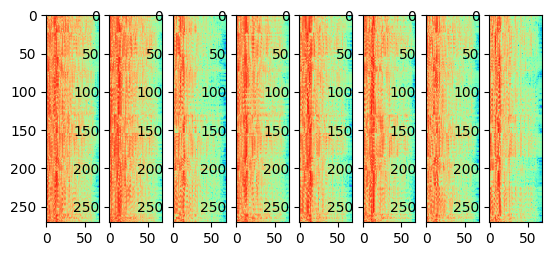

In [137]:
# 同じクラスのデータ
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(torch.log(torch.abs(torch.fft.rfft(transform_std(X_0_0[i]))[:, 1:70]) ** 2), cmap="rainbow")
plt.show()

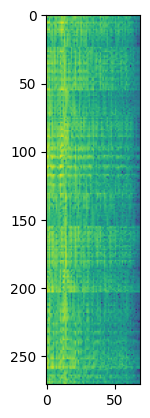

In [151]:
torch.log(torch.abs(torch.fft.rfft(X_0_0[0])[:, 1:70]) ** 2)


In [149]:
torch.log(torch.abs(torch.fft.rfft(X_0_0)[:, :, 1:70]) ** 2)

tensor([[[10.7582,  8.9270,  8.0140,  ...,  1.4236,  2.1737,  0.3382],
         [11.2861,  8.4414,  6.8906,  ...,  2.3447,  2.3602,  1.8852],
         [11.0462,  7.2606,  7.9022,  ...,  2.2144,  2.1474,  2.0429],
         ...,
         [ 7.8460,  7.1987,  8.6153,  ...,  2.1773,  1.8053,  1.8257],
         [ 8.1973,  9.1109, 10.1579,  ...,  3.8194,  3.1561,  3.3520],
         [ 8.8557,  6.8127,  8.6738,  ...,  0.7447,  0.8706,  0.7586]],

        [[ 9.0644,  8.9315,  8.0187,  ...,  3.0848,  2.0138,  1.6056],
         [ 8.7829,  9.3745,  7.5992,  ...,  1.1767,  1.0422,  0.5406],
         [ 7.9524,  9.7193,  7.6035,  ...,  1.4551,  1.4522,  0.4951],
         ...,
         [10.3494,  8.6929,  7.8410,  ...,  2.0624,  0.4217,  1.7938],
         [ 8.1108,  7.2199,  9.1693,  ...,  1.2142,  1.6711,  1.9621],
         [ 7.2334,  6.4602,  7.3723,  ...,  1.9639,  1.0049,  1.2676]],

        [[ 7.2346,  8.3206,  4.0392,  ...,  1.3870, -0.5768, -1.0913],
         [ 7.4450,  8.2553,  7.6623,  ...,  0

tensor([[[ 2.1234,  1.3816,  1.0118,  ..., -1.6579, -1.3540, -2.0976],
         [ 2.3372,  1.1849,  0.5567,  ..., -1.2848, -1.2785, -1.4709],
         [ 2.2401,  0.7066,  0.9665,  ..., -1.3376, -1.3647, -1.4070],
         ...,
         [ 0.9437,  0.6815,  1.2554,  ..., -1.3526, -1.5033, -1.4950],
         [ 1.0860,  1.4561,  1.8803,  ..., -0.6874, -0.9561, -0.8767],
         [ 1.3527,  0.5251,  1.2790,  ..., -1.9329, -1.8819, -1.9273]],

        [[ 1.4549,  1.3997,  1.0205,  ..., -1.0290, -1.4738, -1.6434],
         [ 1.3379,  1.5837,  0.8463,  ..., -1.8215, -1.8774, -2.0858],
         [ 0.9930,  1.7269,  0.8480,  ..., -1.7059, -1.7071, -2.1047],
         ...,
         [ 1.9886,  1.3006,  0.9467,  ..., -1.4536, -2.1351, -1.5652],
         [ 1.0588,  0.6887,  1.4984,  ..., -1.8059, -1.6162, -1.4953],
         [ 0.6943,  0.3732,  0.7520,  ..., -1.4946, -1.8929, -1.7838]],

        [[ 1.0653,  1.4919, -0.1900,  ..., -1.2320, -2.0034, -2.2055],
         [ 1.1479,  1.4663,  1.2333,  ..., -1

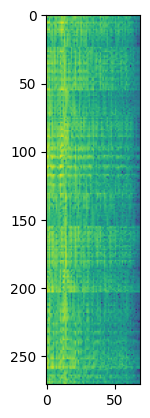

In [161]:
mean = torch.log(torch.abs(torch.fft.rfft(X_0_0)[:, :, 1:70]) ** 2).mean(dim=(1, 2), keepdim=True)
std = torch.log(torch.abs(torch.fft.rfft(X_0_0)[:, :, 1:70]) ** 2).std(dim=(1, 2), keepdim=True)
print((torch.log(torch.abs(torch.fft.rfft(X_0_0)[:, :, 1:70]) ** 2) - mean) / (std + 10**(-6)))
for i in (torch.log(torch.abs(torch.fft.rfft(X_0_0)[:, :, 1:70]) ** 2) - mean) / (std + 10**(-6)):
    plt.imshow(i)
    break

これら(チャネル毎規格化、フーリエ変換、各画像毎の規格化)を実装しただけでは、過学習した  
View run robust-haze-1 at: https://wandb.ai/sci-osaka-u/MEG-classification/runs/2exlw6p9  
outputs/2024-06-08/18-59-51

比較 (生データ)  
View run sunny-glitter-2 at: https://wandb.ai/sci-osaka-u/MEG-classification/runs/cqkvqy7t  
outputs/2024-06-08/19-16-34